<a href="https://colab.research.google.com/github/komorimasashi/Hokudai2023Resources/blob/main/BodySoapBottlePCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ボトル印象の主成分分析

17種類のボディソープの印象をSD法で85人が評価した結果を平均したデータを，主成分分析で分析する．  
実際には，これらのボトルの輪郭形状だけを取り出し，印象評価をさせている．

> 【出典】小森政嗣, 川村智, 横山卓未, 森下佳昌. (2012). 楕円フーリエ記述子を用いた  
ボディソープボトル形状の分析と評価. 日本包装学会誌, 21(6), 479-491.




印象評価に使用したボディソープボトル（抜粋）

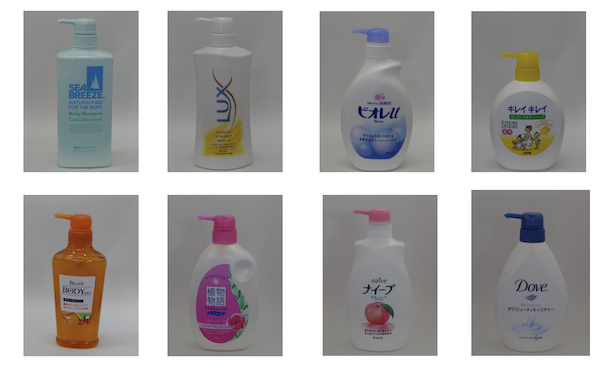

### 印象評価データの読み込み

In [ ]:
system("apt-get -y install fonts-ipafont-gothic")

In [ ]:
# csvデータのダウンロードと読み込み ------------------------------------------------------
dat <- read.csv("https://www.dropbox.com/s/d7vh5zt0ld16izs/bottle_eval.csv?dl=1",
                header=TRUE,row.names=1,fileEncoding = "CP932") #CP932は文字コードの対応
head(dat)

,健康的な,家族向けの,個性的な,洗練された,爽やかな,大人っぽい,自然な,肌にやさしい,美しい,新鮮な,今風な,かわいい,親しみやすい,落ち着いた,派手な,元気がある,軽やかな,信頼できる,上品な
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEABREEZE,4.752941,4.105882,2.517647,4.329412,5.011765,4.917647,3.117647,4.470588,5.000000,3.576471,3.470588,3.258824,5.023529,5.658824,2.400000,3.411765,4.764706,5.000000,4.847059
LUX extra rich,4.494118,2.941176,4.305882,4.952941,5.058824,5.282353,3.035294,4.141176,5.117647,4.635294,5.082353,3.835294,4.247059,4.564706,3.858824,4.117647,4.776471,4.588235,5.211765
ビオレu,4.352941,3.752941,5.164706,4.094118,4.141176,4.035294,2.588235,4.517647,3.964706,4.352941,4.482353,3.729412,3.705882,3.905882,3.976471,4.094118,3.752941,3.952941,4.023529
キレイキレイ,4.294118,5.623529,3.458824,3.129412,3.070588,3.117647,3.600000,4.611765,3.082353,3.211765,3.047059,3.188235,4.458824,4.835294,3.047059,4.258824,2.023529,4.494118,3.705882
ビオレボディデリ,4.317647,2.211765,5.164706,5.352941,5.058824,5.611765,2.552941,4.211765,5.082353,4.776471,5.117647,3.505882,3.835294,4.635294,4.270588,4.070588,5.247059,4.435294,5.305882
植物物語,3.917647,5.082353,4.211765,3.317647,3.152941,3.717647,3.117647,4.058824,3.000000,3.905882,3.658824,3.223529,3.635294,4.717647,2.729412,3.800000,2.258824,3.905882,3.411765


In [ ]:
# ボディーソープの種類
nrow(dat)

[1] 17

In [ ]:
# 評定語対の項目数
ncol(dat)

[1] 19

### 主成分分析

In [ ]:
# 主成分分析 ---------------------------------------------------------------------
#scale=TRUEにすると相関行列基づいて，scale=FALSEにすると分散共分散行列に基づいてPCAを行う
result <- prcomp(dat, scale=TRUE)

第3主成分まででデータのばらつきのうち9割を説明できることがわかる

In [ ]:
# 固有値（の平方根），寄与率，累積寄与率などのまとめ
summary(result)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     3.1053 2.3072 1.4835 0.72055 0.68561 0.52009 0.4508
Proportion of Variance 0.5075 0.2802 0.1158 0.02733 0.02474 0.01424 0.0107
Cumulative Proportion  0.5075 0.7877 0.9035 0.93084 0.95558 0.96981 0.9805
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.32777 0.29545 0.2617 0.21846 0.14673 0.13644 0.10244
Proportion of Variance 0.00565 0.00459 0.0036 0.00251 0.00113 0.00098 0.00055
Cumulative Proportion  0.98617 0.99076 0.9944 0.99688 0.99801 0.99899 0.99954
                          PC15    PC16      PC17
Standard deviation     0.06909 0.06287 1.129e-15
Proportion of Variance 0.00025 0.00021 0.000e+00
Cumulative Proportion  0.99979 1.00000 1.000e+00

In [ ]:
print(result$x) #主成分得点

                             PC1        PC2         PC3         PC4         PC5
SEABREEZE             1.36243072  4.8175722  0.71843965 -0.28179753 -0.65708288
LUX extra rich       -3.42149065  1.9843810 -0.73535398 -0.01823803  0.49253664
ビオレu              -1.39648897 -2.2310931 -0.54908113 -0.63276715 -1.03365410
キレイキレイ          4.58211659 -2.1785889 -0.02785623  1.25261387  0.08656110
ビオレボディデリ     -4.89282031  1.6643334  0.30072499  0.14957384  0.33374615
植物物語              2.22511846 -3.5893999  2.65520634 -0.51694203  0.30848282
Naive（現行）        -3.35369849 -0.6649836 -0.55884618  0.09431442  0.87870982
Dove                  3.19391654 -1.4052718  1.48772527  0.25690350  1.03488763
SUPER MILD           -0.86798842 -1.1997859 -0.55268874 -1.20822485  0.05858373
KUYURA               -4.35368877 -0.8863502  0.94729372  1.65800267 -0.77509478
カウブランド無添加    5.66107462  3.2587331 -1.53845931  0.23958232 -0.42814301
ミルキィボディソープ  2.32816609  1.2072011 -1.62477264 -0.34168973  1.07645347
Boun

In [ ]:
print(result$sdev) #固有値の平方根

 [1] 3.105324e+00 2.307159e+00 1.483476e+00 7.205488e-01 6.856126e-01
 [6] 5.200914e-01 4.508161e-01 3.277667e-01 2.954478e-01 2.616918e-01
[11] 2.184595e-01 1.467296e-01 1.364367e-01 1.024374e-01 6.909339e-02
[16] 6.287098e-02 1.128706e-15


In [ ]:
print(result$rotation) #固有ベクトル

                     PC1         PC2         PC3          PC4         PC5
健康的な      0.07102738  0.28923868 -0.37526473  0.172192781 -0.53172385
家族向けの    0.30662722 -0.10801808 -0.07768864  0.057776250  0.02083393
個性的な     -0.25823852 -0.24320397 -0.05648948 -0.026795134  0.13029715
洗練された   -0.28155096  0.19455586  0.01793102  0.081904547  0.15780740
爽やかな     -0.22962793  0.29026821 -0.01274024 -0.110094774 -0.24692133
大人っぽい   -0.26257649  0.21195544  0.08979271  0.191643570  0.14455190
自然な        0.27250257  0.08751488 -0.17267209 -0.032700029  0.56436011
肌にやさしい  0.21386348  0.06914752 -0.40785699  0.004947225 -0.03343468
美しい       -0.22115068  0.30024778 -0.05776736 -0.035981511  0.06506201
新鮮な       -0.30673998 -0.08843905 -0.05352099  0.035617426  0.09763462
今風な       -0.30744388 -0.04658250 -0.08759767  0.009755872  0.20605418
かわいい     -0.07650437 -0.06291041 -0.56333809 -0.584444683  0.18491805
親しみやすい  0.22064808  0.24767470 -0.25864005  0.018573019  0.02200937
落ち着いた    0.17848952

### プロット

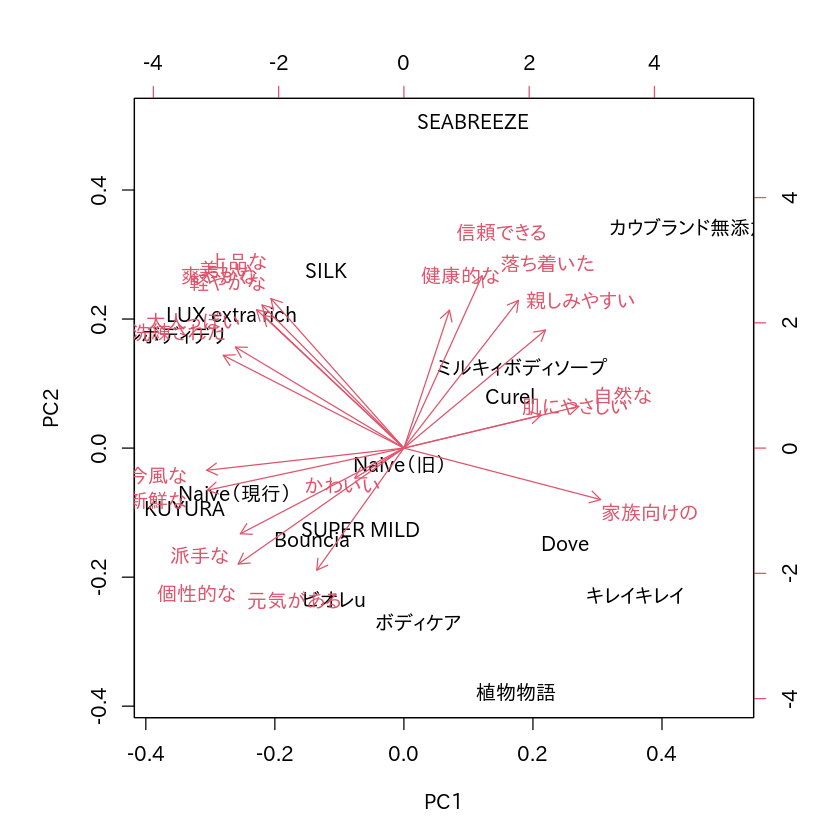

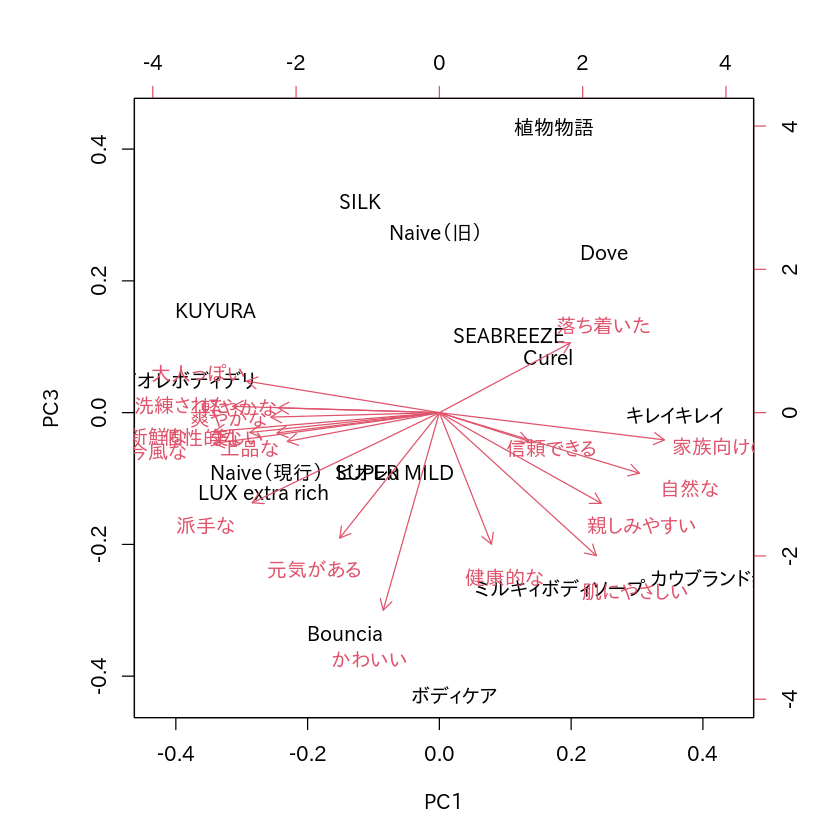

In [ ]:
par(family = "IPAPGothic") #プロットする際に必要
biplot(result) #バイプロット（第１，第２主成分）
biplot(result, choi=c(1,3)) #バイプロット（第１，第３主成分）

### Ward法によるクラスタ分析

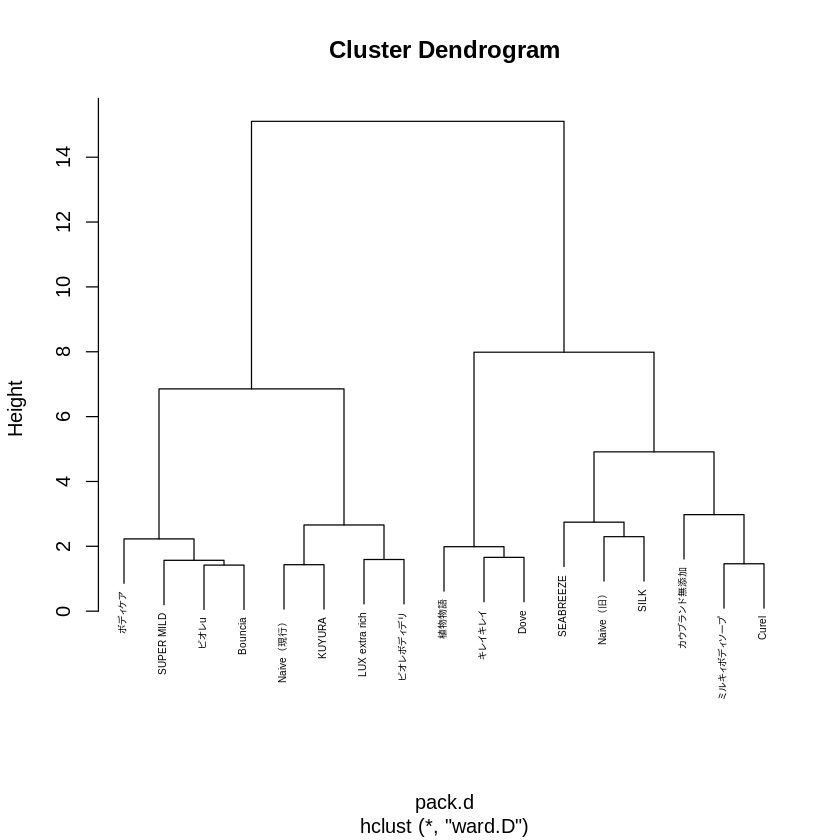

In [ ]:
# クラスタ分析 ------------------------------------------------------------------
pack.d <- dist(dat) #距離行列に変換
pack.hc<-hclust(pack.d, method = "ward.D") #ウォード法によるクラスタ分析
plot(pack.hc, cex= .5 )

### 多次元尺度構成法(MDS)

In [ ]:
# 距離行列を作成する（ここでは仮のデータを使用）
# サンプルデータの場合、あらかじめ距離行列を用意する必要がありますが、
# 本例ではランダムに生成します。
# 距離行列を作成する関数
create_symmetric_distance_matrix <- function(n) {
  distance_matrix <- matrix(runif(n^2), ncol = n)
  for (i in 1:n) {
    for (j in 1:n) {
      # AからBとBからAの距離を等しくする
      distance_matrix[i, j] <- distance_matrix[j, i]
    }
    # 自身への距離を0にする
    distance_matrix[i, i] <- 0
  }
  return(distance_matrix)
}

# 距離行列を作成
set.seed(123) # 再現性のためのシード値
num_points <- 8
distance_matrix <- create_symmetric_distance_matrix(num_points)

# 距離行列の中身を表示（１０個の点どうしの距離が書かれている）
distance_matrix

0.0000000,0.7883051,0.4089769,0.8830174,0.9404673,0.0455565,0.5281055,0.8924190
0.7883051,0.0000000,0.9568333,0.4533342,0.6775706,0.5726334,0.1029247,0.8998250
0.4089769,0.9568333,0.0000000,0.9545036,0.8895393,0.6928034,0.6405068,0.9942698
0.8830174,0.4533342,0.9545036,0.0000000,0.2891597,0.1471136,0.9630242,0.9022990
0.9404673,0.6775706,0.8895393,0.2891597,0.0000000,0.2164079,0.3181810,0.2316258
0.0455565,0.5726334,0.6928034,0.1471136,0.2164079,0.0000000,0.2330341,0.4659625
0.5281055,0.1029247,0.6405068,0.9630242,0.3181810,0.2330341,0.0000000,0.2065314
0.8924190,0.8998250,0.9942698,0.9022990,0.2316258,0.4659625,0.2065314,0.0000000


            X           Y
1  0.49427777  0.07353573
2 -0.15064360  0.23773710
3  0.55650030  0.03753077
4 -0.32505752  0.47889176
5 -0.37380736 -0.10061209
6 -0.01818912  0.06427506
7  0.05614360 -0.30979837
8 -0.23922408 -0.48155997


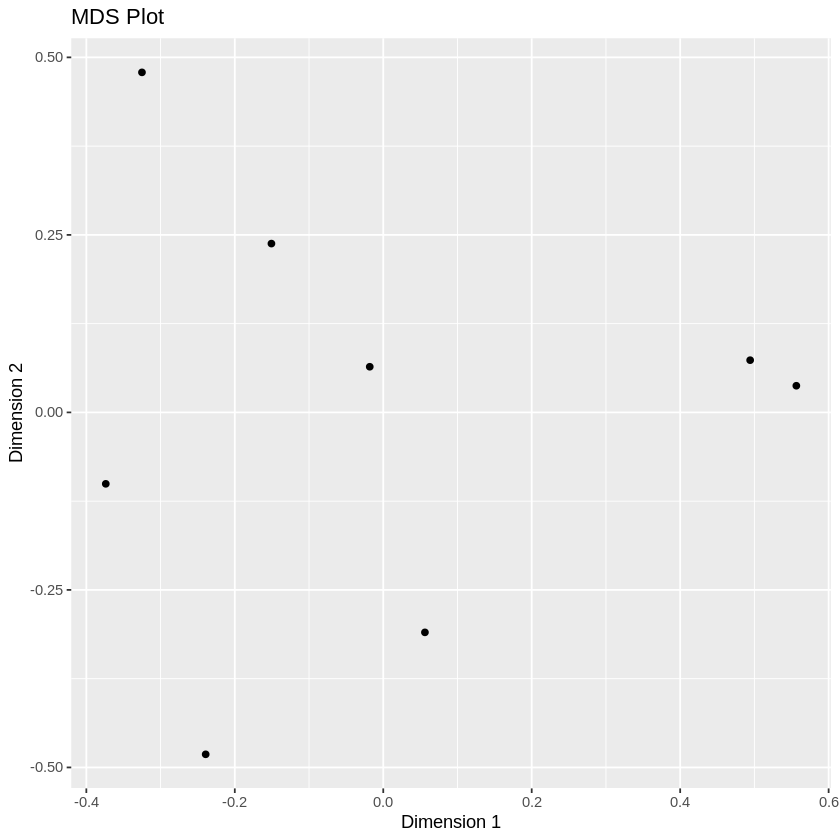

In [ ]:
# パッケージをロードする
library(ggplot2)


# MDSを実行して2次元座標を計算する
mds_result <- cmdscale(distance_matrix, k = 2)

# MDS結果をデータフレームに変換
mds_df <- as.data.frame(mds_result)
colnames(mds_df) <- c("X", "Y")

# データフレームを表示
print(mds_df)

# 2次元プロットを作成
ggplot(mds_df, aes(x = X, y = Y)) +
  geom_point() +
  labs(title = "MDS Plot", x = "Dimension 1", y = "Dimension 2")


               X           Y
札幌    8.626887  0.22327628
東京    0.426659 -0.03052573
名古屋 -1.805237 -0.97157630
大阪   -2.384529  0.04878719
福岡   -4.863779  0.73003856


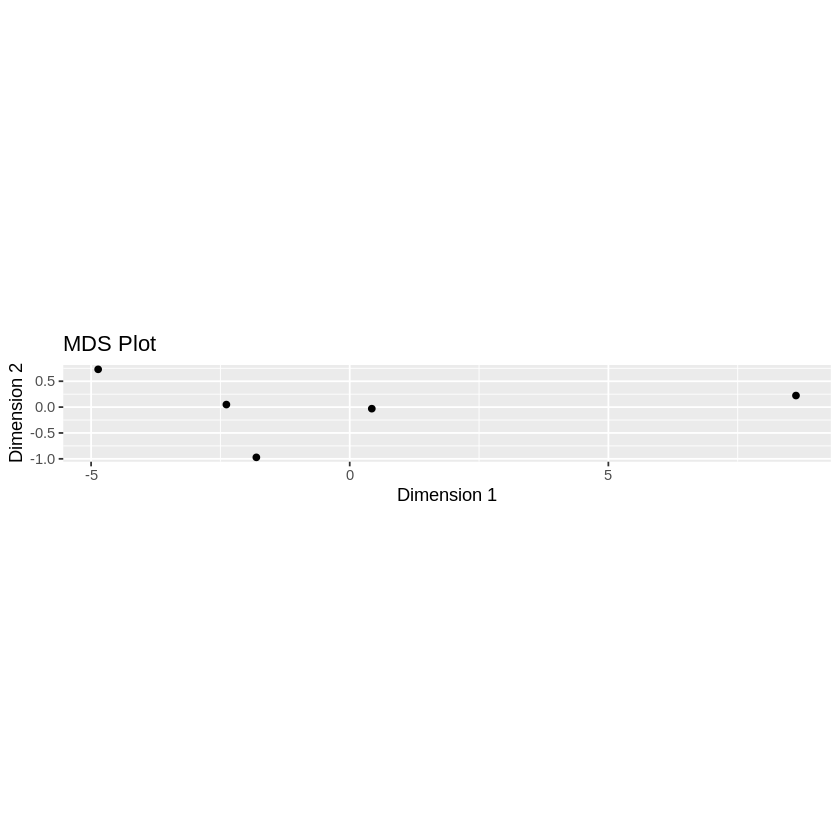

In [ ]:
# 都市名
cities <- c("札幌", "東京", "名古屋", "大阪", "福岡")

# 移動時間行列のデータを入力する
data <- c(0, 8, 10.5, 11, 13.5,
          8, 0, 1.5, 2.5, 5,
          10.5, 1.5, 0, 1, 3.5,
          11, 2.5, 1, 0, 2.5,
          13.5, 5, 3.5, 2.5, 0)

# 行列に変換する
distance_matrix <- matrix(data, nrow = 5, byrow = TRUE)

# 行名と列名を設定する
rownames(distance_matrix) <- cities
colnames(distance_matrix) <- cities

# MDSを実行して2次元座標を計算する
mds_result <- cmdscale(distance_matrix, k = 2)

# MDS結果をデータフレームに変換
mds_df <- as.data.frame(mds_result)
colnames(mds_df) <- c("X", "Y")

# データフレームを表示
print(mds_df)

# 2次元プロットを作成
ggplot(mds_df, aes(x = X, y = Y)) +
  geom_point() +
  coord_fixed() +
  labs(title = "MDS Plot", x = "Dimension 1", y = "Dimension 2")